### An easy example of the application of EM algorithm.

#### Problem Background
There are a total of N groups of people, and the height of each group of people follows a normal distribution, with N different normal distributions in total. However, these N groups of people are mixed together and form one large group of people. 

Now, it is required to divide this large group of people into N groups and estimate the mean and variance of the height for each group. The EM algorithm is highly suitable for this problem.

$\textcolor{red}{ Notation:  }$ the code may still have one bug and I am not sure whether I write it correctly. But at most time it work well.

In [4]:
import numpy as np
import random, math 
from scipy.stats import multivariate_normal

In [42]:
def gaussian(x, mean, variance):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * variance)))
    return (1 / (math.sqrt(2 * math.pi * variance))) * exponent

def EM_algorithm(data, num_clusters, num_iterations):

    # Randomly initialize means and variances
    means = [random.uniform(min(data), max(data)) for _ in range(num_clusters)]
    variances =[1.0] * num_clusters

    for x in range(num_iterations):
        # E-step: Calculate the probability of each sample belonging to each cluster
        responsibilities = []
        for x in data:
            probabilities =[gaussian(x, mean, variance) for mean, variance in zip(means, variances)]

        #len(probabilities): num_clusters
            total_probability = sum(probabilities)
            responsibilities.append([p / total_probability for p in probabilities])

        # M-step: Update the means and variances
        for i in range(num_clusters):
            total_responsibility = sum(r[i] for r in responsibilities)
            # responsibilities[i] represents the probability that sample data[i] belongs to the i-th Gaussian distribution
            # responsibilities[j][i] * data[j] represents the product of sample data[j] and its corresponding Gaussian probability.
            # The purpose of this product is to calculate the new mean as a weighted average.
            # By multiplying the weight of each sample by its corresponding value, we get weighted sample values.
            # Then, by summing up these weighted sample values and dividing by the total corresponding probability (total_responsibility),
            # we obtain the new mean.
            means[i] = sum(responsibilities[j][i] * data[j] for j in range(len(data))) / total_responsibility
            variances[i] = sum( responsibilities[j][i] * (data[j] - means[i]) ** 2 for j in range(len(data))) / total_responsibility
            
    return means, variances

In [162]:
num_clusters = 3

# true_means = np.array([1.5,10.5])
# true_variances =  np.array([0.5,3])

true_means = np.random.uniform(0, 30, num_clusters)
true_variances = np.random.uniform(0, 10, num_clusters)
print(true_means, true_variances)

d = np.concatenate([np.random.normal(mean, np.sqrt(variance), size=100) for mean, variance in zip(true_means, true_variances)])
points = d.reshape((num_clusters, -1))

# Call EM_algorithm to estimate Gaussian distribution parameters
estimated_means, estimated_variances = EM_algorithm(d, num_clusters = num_clusters, num_iterations=1000)
estimated_means, estimated_variances = np.array(estimated_means), np.array(estimated_variances)

# Calculate the errors 
mean_errors = np.abs(estimated_means -  true_means)
variance_errors = np.abs(estimated_variances - true_variances)

print("Mean Error: ", mean_errors)
print("Var Error: ", variance_errors)

[23.16696552  5.76607415 25.44652533] [3.94280215 5.37994785 4.57747405]
Mean Error:  [0.05503656 0.2874811  0.31933409]
Var Error:  [0.43354832 1.35980329 1.09073411]


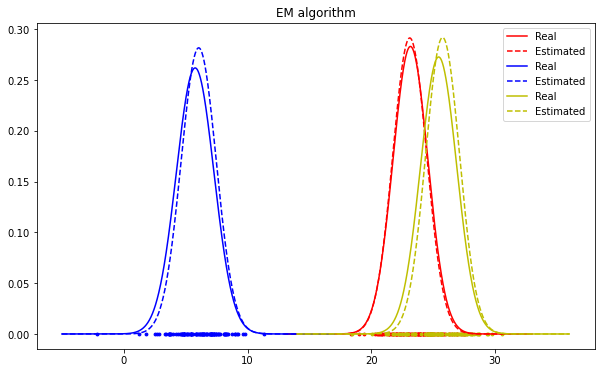

In [163]:
import matplotlib.pyplot as plt

def gaussian_y(x, mean, variance):
    exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
    return (1 / (np.sqrt(2 * np.pi * variance))) * exponent


sampling_rate = 100
colors = ['r', 'b', 'y']
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_clusters):
    start, end = int(true_means[i]- 5 * np.sqrt(true_variances[i])), int(true_means[i] + 5 * np.sqrt(true_variances[i]))
    x = np.linspace(start, end, int(10 * sampling_rate * np.sqrt(true_variances[i])))
    ax.plot(x, gaussian_y(x, true_means[i], np.sqrt(true_variances[i])), color=colors[i], label='Real')
    ax.plot(x, gaussian_y(x, estimated_means[i], np.sqrt(estimated_variances[i])), color=colors[i], linestyle='dashed', label='Estimated')
    ax.scatter(points[i], np.zeros(points[i].shape), color=colors[i], s=8)

ax.legend()
ax.set_title('EM algorithm')

plt.savefig('../Pic/EM_example5.jpg', dpi=300)